## Importing the librarries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
start="2010-01-01"
end="2019-12-31"
dataframe=pdr.DataReader("AAPL","yahoo",start,end)
df1=dataframe.copy()

In [3]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553027
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [4]:
df1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027306
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389572
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813293
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337975


In [5]:
# Creating new index
df2=df1.reset_index()
df2.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553027
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [6]:
# Dropping date and adj-close column
df3=df2.drop(["Date","Adj Close"], axis=1)
df3.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    2517 non-null   float64
 1   Low     2517 non-null   float64
 2   Open    2517 non-null   float64
 3   Close   2517 non-null   float64
 4   Volume  2517 non-null   float64
dtypes: float64(5)
memory usage: 98.4 KB


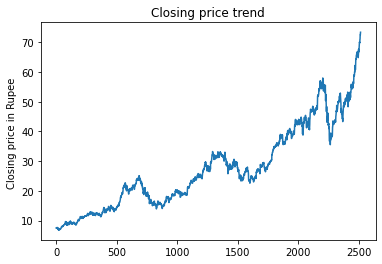

In [8]:
# Closing price trend
plt.plot(df3.Close)
plt.title('Closing price trend')
plt.ylabel('Closing price in Rupee ')
plt.show()

In [9]:
# 50 days moving average, it will give mean of last 50 values of data
ma50=df3.Close.rolling(50).mean()
print(ma50)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    65.16060
2513    65.43355
2514    65.71070
2515    65.99190
2516    66.27810
Name: Close, Length: 2517, dtype: float64


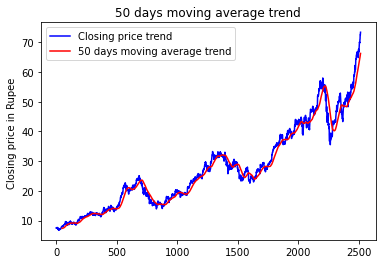

In [10]:
#  50 days moving average trend of closing price 
plt.plot(df3.Close,"b",label="Closing price trend")
plt.plot(ma50,"r",label="50 days moving average trend")
plt.title('50 days moving average trend')
plt.ylabel('Closing price in Rupee ')
plt.legend()
plt.show()

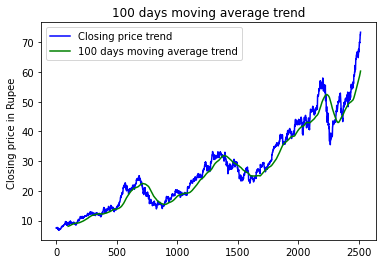

In [11]:
# 100 days moving average trend of closing price
ma100=df3.Close.rolling(100).mean()
plt.plot(df3.Close,"b",label="Closing price trend")
plt.plot(ma100,"g",label="100 days moving average trend")
plt.title('100 days moving average trend')
plt.ylabel('Closing price in Rupee ')
plt.legend()
plt.show()

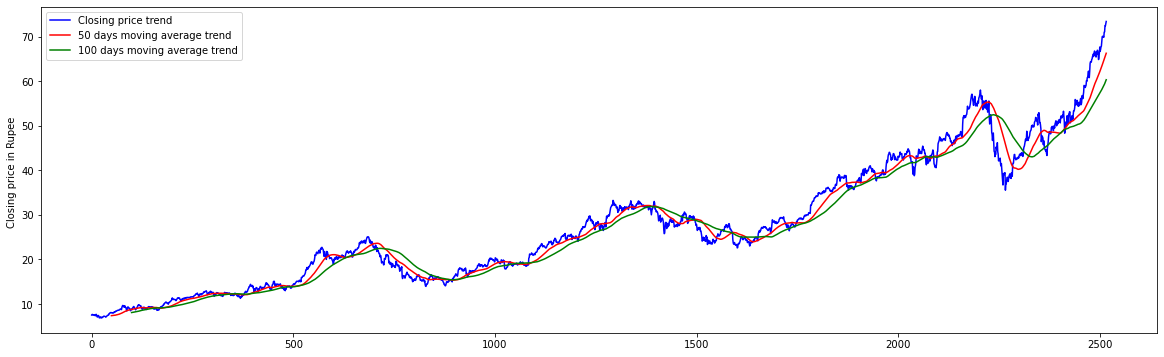

In [12]:
# Combine plots
plt.figure(figsize=(20,6))
plt.plot(df3.Close,"b",label="Closing price trend")
plt.plot(ma50,"r",label="50 days moving average trend")
plt.plot(ma100,"g",label= "100 days moving average trend")
plt.ylabel('Closing price in Rupee ')
plt.legend()
plt.show()

In [13]:
df3.shape

(2517, 5)

In [14]:
#spilliting data into training and testing
data_training=pd.DataFrame(df3["Close"][0:int(len(df3)*0.70)])
data_testing=pd.DataFrame(df3["Close"][int(len(df3)*0.70):int(len(df3))])

In [15]:
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [16]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


#  Data preprocessing

In [17]:
# Feature Scaling of training data
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)

In [18]:
print(data_training_array)

[[0.02527908]
 [0.02971782]
 [0.03021854]
 ...
 [0.84388656]
 [0.85089656]
 [0.84616011]]


In [19]:
data_training_array.shape

(1761, 1)

In [20]:
#Creating a training data structure with 100 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [21]:
# Converting the x_train, y_train to numpy arrays
x_train,y_train=np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1661, 100, 1)
(1661,)


# Building the LSTM model

In [22]:
#Importing the keras libraries and packages
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
#Initialising the model
model=Sequential()

In [24]:
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1],1))) 
model.add(Dropout(0.2))

#Adding a Second LSTM layer and some Dropout regularisation
model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

#Adding a Third LSTM layer and some Dropout regularisation
model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

#Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

#Adding the output layer
model.add(Dense(units=1)) #to connect all upper layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
# Compiling the model
model.compile(optimizer="adam",loss="mean_squared_error") 

# Fitting the model to the training set
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 8s 108ms/step - loss: 0.0487
Epoch 2/50
52/52 [==============================] - 6s 106ms/step - loss: 0.0117
Epoch 3/50
52/52 [==============================] - 6s 108ms/step - loss: 0.0100
Epoch 4/50
52/52 [==============================] - 8s 146ms/step - loss: 0.0094
Epoch 5/50
52/52 [==============================] - 7s 144ms/step - loss: 0.0084
Epoch 6/50
52/52 [==============================] - 8s 146ms/step - loss: 0.0075
Epoch 7/50
52/52 [==============================] - 8s 145ms/step - loss: 0.0079
Epoch 8/50
52/52 [==============================] - 7s 142ms/step - loss: 0.0075
Epoch 9/50
52/52 [==============================] - 8s 145ms/step - loss: 0.0073
Epoch 10/50
52/52 [==============================] - 8s 145ms/step - loss: 0.0074
Epoch 11/50
52/52 [==============================] - 7s 143ms/step - loss: 0.0067
Epoch 12/50
52/52 [==============================] - 8s 146ms/step - loss: 0.0068
Epoch 13/50
52/52 [======

In [27]:
# Creating test data 

In [30]:
data_testing.head()
past_100_days_data=data_training.tail(100)
final_df=past_100_days_data.append(data_testing,ignore_index=True)

In [31]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [37]:
# Scaling down test data set
input_data=scaler.fit_transform(final_df)

In [38]:
# Creating the testing data set
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [39]:
# Converting the x_test, y_test to numpy arrays
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [42]:
# Making prediction
y_predicted=model.predict(x_test)
y_predicted.shape

(756, 1)

In [43]:
Scaler_scale=scaler.scale_ #finding factor by which MinMaxScaler scaled down data eariler
print(Scaler_scale)

[0.02099517]


In [44]:
scale_factor=1/Scaler_scale

In [45]:
# Calculating RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error

In [46]:
x_train_column=x_train[:,1]
print(x_train_column.shape)
print(y_train.shape)

(1661, 1)
(1661,)


In [47]:
y_train=y_train*scale_factor
rmse_x_train=x_train_column*scale_factor

In [48]:
# RMSE(Root Mean Square Error) value of train data
math.sqrt(mean_squared_error(rmse_x_train,y_train))

6.313035527756586

In [49]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor
math.sqrt(mean_squared_error(y_test,y_predicted))

1.9844357322960355

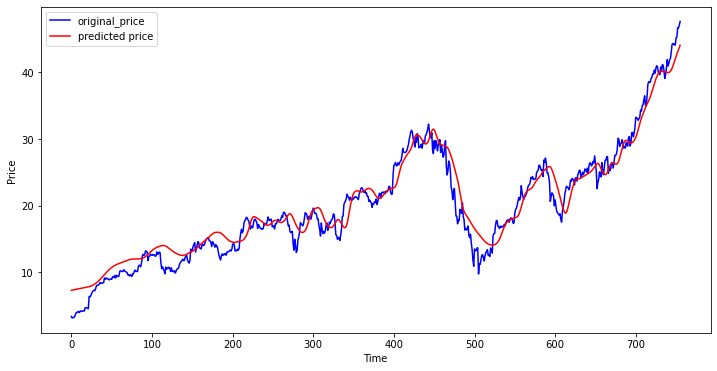

In [47]:
# Visualising the results
plt.figure(figsize=(12,6))
plt.plot(y_test,"b",label="original_price")
plt.plot(y_predicted,"r",label="predicted price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()